# Student Depression Dataset

Import Statements

In [ ]:
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import  LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBClassifier as xgbc

In [177]:
!pip install --upgrade xgboost


In [6]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('student_depression_exp')

<Experiment: artifact_location='file:c:/Users/cathy/Documents/SDPAproject2025/Student-Depression/mlruns/1', creation_time=1768393657272, experiment_id='1', last_update_time=1768393657272, lifecycle_stage='active', name='student_depression_exp', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [7]:
import pickle

In [8]:
df = pd.read_csv('student_depression_dataset.csv')

In [9]:
df = df.drop('id',axis=1)

Exploratory Data Analysis

In [10]:
df.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [12]:
df.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [13]:
df.shape

(27901, 17)

In [14]:
df.isna().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

Visualisations and Grouping

In [16]:
academic = df.groupby(['Academic Pressure'])['CGPA'].mean().reset_index()
academic

,Academic Pressure,CGPA
0,0.0,2.173333
1,1.0,7.724066
2,2.0,7.699495
3,3.0,7.646876
4,4.0,7.616541
5,5.0,7.626653


In [17]:
sleep = df.groupby(['Sleep Duration'])['CGPA'].mean().reset_index()

In [18]:
work = df.groupby(['Degree'])['Work/Study Hours'].mean().reset_index().sort_values
work


<bound method DataFrame.sort_values of         Degree  Work/Study Hours
0   'Class 12'          7.278289
1       B.Arch          7.266576
2        B.Com          7.227756
3         B.Ed          7.164971
4      B.Pharm          6.708642
5       B.Tech          7.070312
6           BA          7.195000
7          BBA          7.031609
8          BCA          7.226797
9           BE          7.161501
10         BHM          7.069189
11         BSc          7.248874
12         LLB          7.226528
13         LLM          6.927386
14       M.Com          6.828338
15        M.Ed          7.021924
16     M.Pharm          7.049828
17      M.Tech          7.393346
18          MA          7.380515
19         MBA          7.357651
20        MBBS          7.051724
21         MCA          7.022031
22          MD          6.973776
23          ME          6.989189
24         MHM          7.178010
25         MSc          7.168908
26      Others          5.857143
27         PhD          6.741379>

In [19]:
job = df.groupby(['Job Satisfaction'])['Work/Study Hours'].mean().reset_index().sort_values(by='Work/Study Hours')
job

,Job Satisfaction,Work/Study Hours
2,2.0,5.333333
4,4.0,5.500000
1,1.0,6.000000
0,0.0,7.157351
3,3.0,8.000000


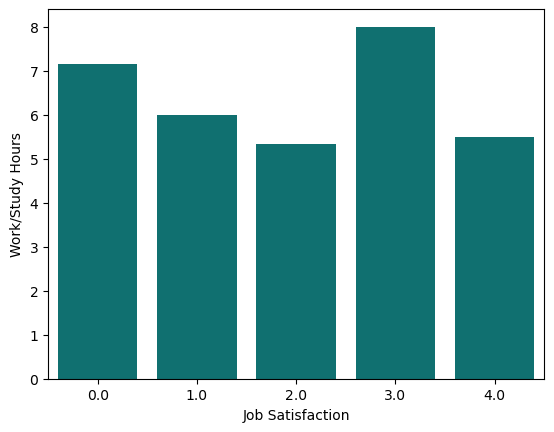

In [20]:
sns.barplot(x=job['Job Satisfaction'],y=job['Work/Study Hours'],color='teal')
plt.show()

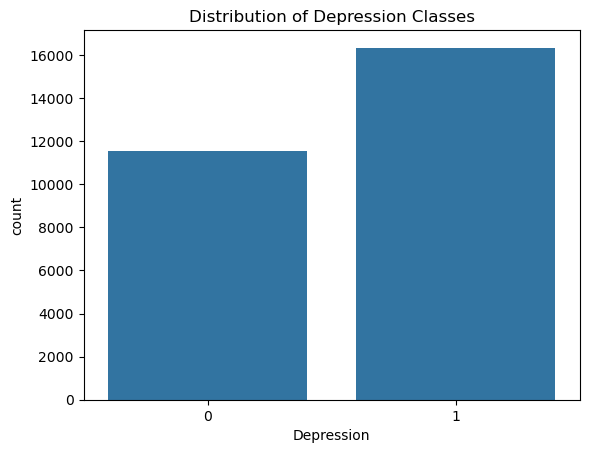

In [21]:
sns.countplot(x=df['Depression'])
plt.title('Distribution of Depression Classes')
plt.show()

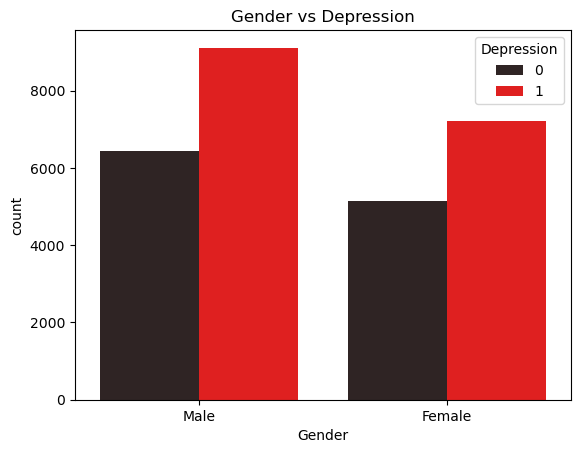

In [22]:
sns.countplot(x='Gender', hue='Depression', data=df, palette='dark:red')
plt.title('Gender vs Depression')
plt.show()

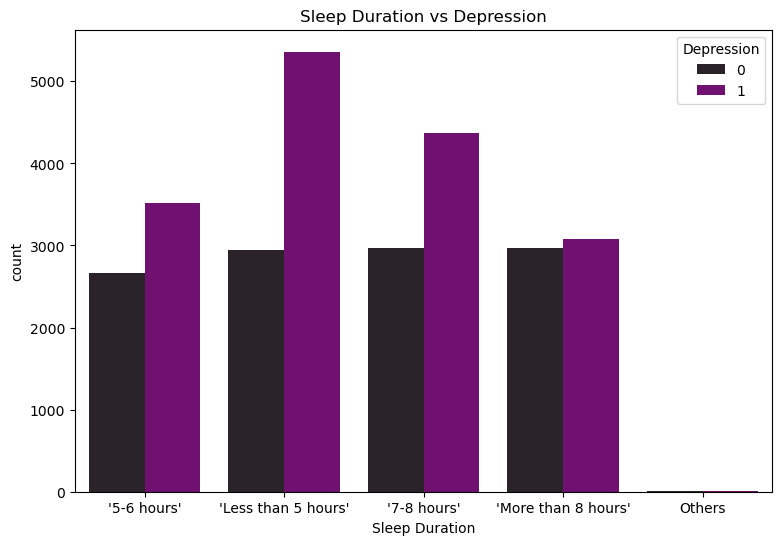

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(x='Sleep Duration', hue='Depression', data=df, palette='dark:purple')
plt.title('Sleep Duration vs Depression')
plt.show()

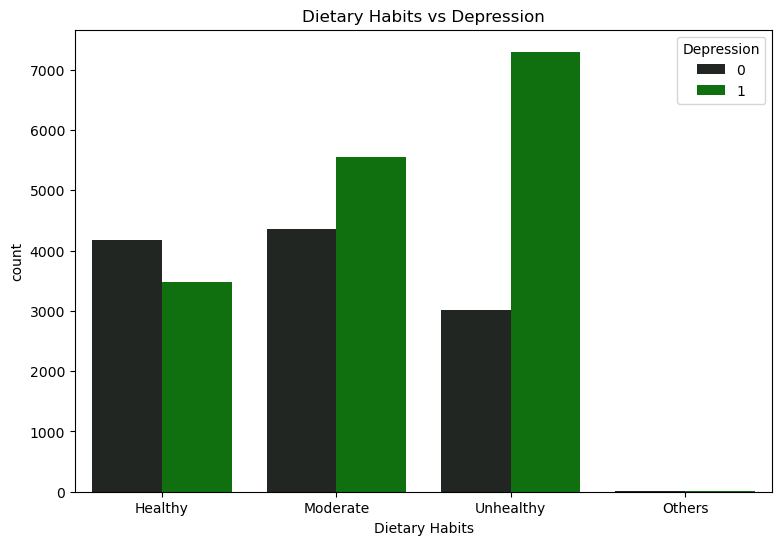

In [24]:
plt.figure(figsize=(9,6))
sns.countplot(x='Dietary Habits', hue='Depression', data=df, palette='dark:green')
plt.title('Dietary Habits vs Depression')
plt.show()

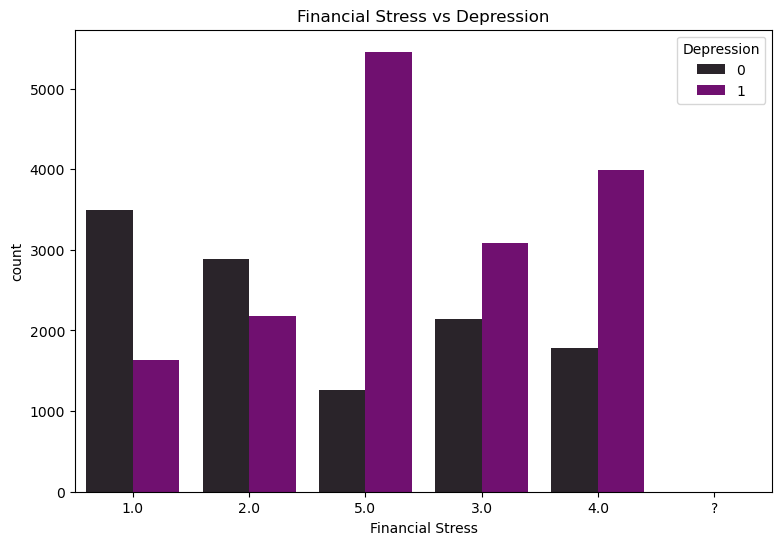

In [25]:
plt.figure(figsize=(9,6))
sns.countplot(x='Financial Stress', hue='Depression', data=df, palette='dark:purple')
plt.title('Financial Stress vs Depression')
plt.show()

C:\Users\cathy\AppData\Local\Temp\ipykernel_19112\4122120356.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, color='blue')


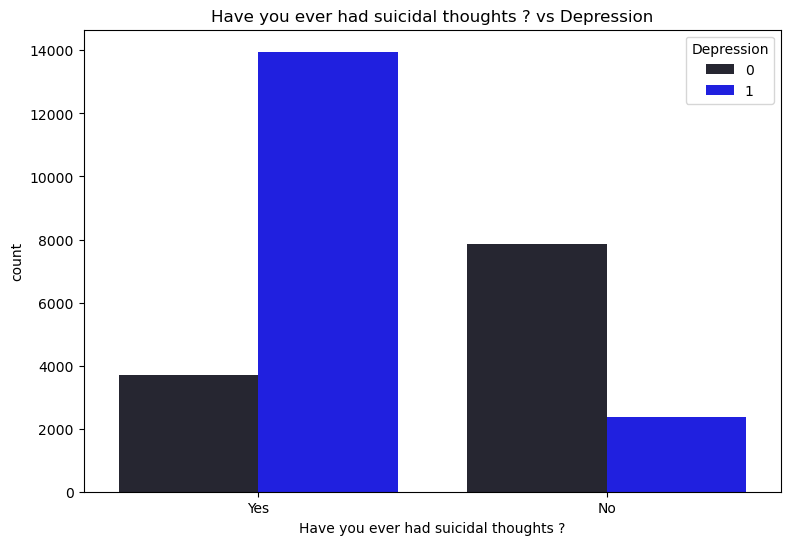

In [26]:
plt.figure(figsize=(9,6))
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df, color='blue')
plt.title('Have you ever had suicidal thoughts ? vs Depression')
plt.show()

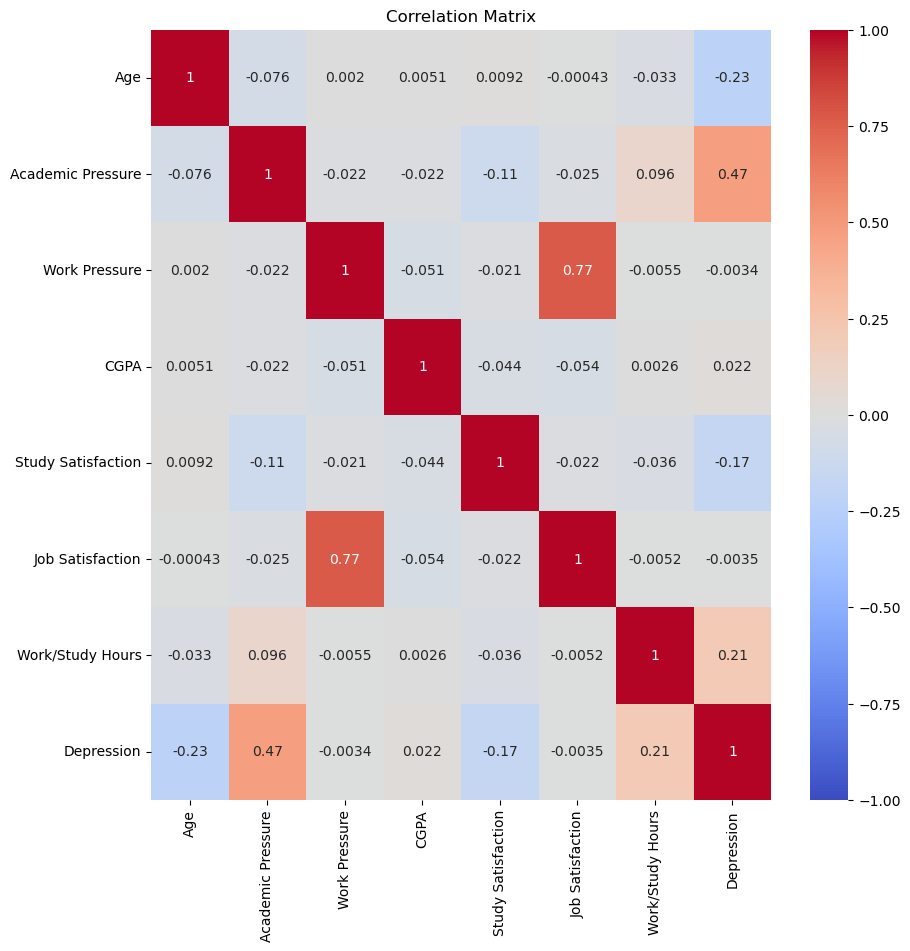

In [28]:
num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

From the plots, academic pressure stands out the most. Students with high academic pressure are much more likely to be depressed, while those with lower pressure are mostly not. Work pressure shows only a small effect since most students don’t experience much of it. CGPA doesn’t really separate depressed and non-depressed students at all, which suggests that grades themselves aren’t the issue. Age shows a slight pattern, with depression appearing a bit more common among younger students. Overall, the plot suggests that it’s the pressure around academics, not actual performance, that is most strongly linked to depression.

In [30]:
depression = df.groupby(['Academic Pressure'])['Depression'].mean().reset_index().sort_values(by='Academic Pressure')


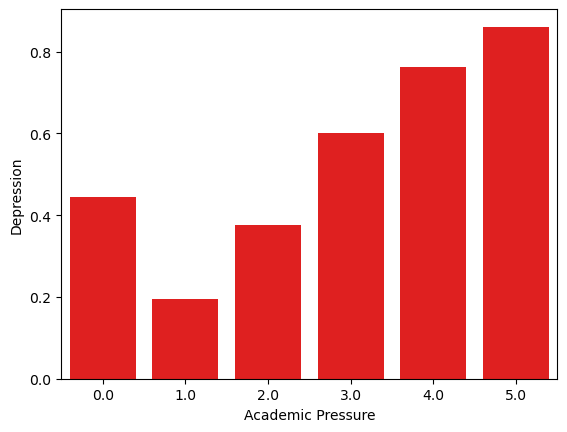

In [31]:
sns.barplot(x=depression['Academic Pressure'],y=depression['Depression'],color='red')
plt.show()

In [32]:
depression = df.groupby(['Age'])['Depression'].mean().reset_index().sort_values(by='Age')
depression


,Age,Depression
0,18.0,0.766226
1,19.0,0.705128
2,20.0,0.705856
3,21.0,0.677289
4,22.0,0.604310
5,23.0,0.638906
6,24.0,0.668291
7,25.0,0.606502
8,26.0,0.574026
9,27.0,0.606703


In [33]:
bins = [18,24,30,36,42,48,54,60]
labels = ['18-24','25-30','31-36','37-42','43-48','49-54','55-60']
df['Age Category'] = pd.cut(df['Age'],bins=bins, labels=labels,include_lowest=True)
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age Category
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,31-36
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,18-24
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,31-36
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,25-30
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,25-30


In [34]:
age_category = df.groupby(['Age Category'])['Depression'].mean().reset_index().sort_values(by='Age Category')
age_category

C:\Users\cathy\AppData\Local\Temp\ipykernel_19112\2158683677.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category = df.groupby(['Age Category'])['Depression'].mean().reset_index().sort_values(by='Age Category')


,Age Category,Depression
0,18-24,0.683891
1,25-30,0.572957
2,31-36,0.409428
3,37-42,0.388889
4,43-48,0.375000
5,49-54,0.000000
6,55-60,0.000000


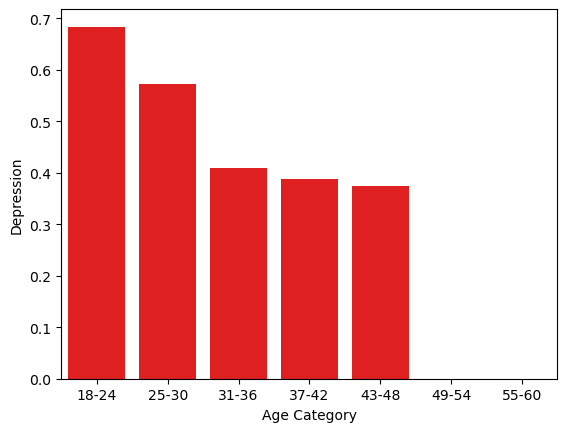

In [35]:
sns.barplot(x=age_category['Age Category'],y=age_category['Depression'],color='red')
plt.show()

In [36]:
job_satisfaction = df.groupby(['Job Satisfaction'])['Work Pressure'].mean().reset_index().sort_values(by='Job Satisfaction')
job_satisfaction

,Job Satisfaction,Work Pressure
0,0.0,0.0
1,1.0,1.0
2,2.0,0.0
3,3.0,0.0
4,4.0,5.0


In [37]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8310
'7-8 hours'            7346
'5-6 hours'            6183
'More than 8 hours'    6044
Others                   18
Name: count, dtype: int64

Modelling

In [66]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [99]:
x = df.drop('Depression',axis=1)
y = df['Depression']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x,y,test_size=0.5, random_state=42)


In [100]:
cat_cols = x_train.select_dtypes(['object']).columns.tolist()
num_cols =  x_train.select_dtypes(['int64','float64']).columns.tolist()
num_transformer = StandardScaler(with_mean=False)
cat_transformer = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
preprocessor = ColumnTransformer([('Num',num_transformer,num_cols),('Col', cat_transformer, cat_cols)])

In [101]:
pipeline ={'LogisticRegression': Pipeline([('preprocessor',preprocessor),('Logisticregression',(LogisticRegression(solver='liblinear',max_iter=1000)))]),
'RandomForestClassifier': Pipeline([('preprocessor',preprocessor),('Randomforestclassifier',RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_split=5))]),
'SVC': Pipeline([('preprocessor',preprocessor),('Svc',SVC(kernel='poly',C=1.0,gamma='scale',class_weight='balanced',probability=True))]),
'XGBoost': Pipeline([('preprocessor',preprocessor),('Xgboost',XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=6,subsample=0.8,colsample_bytree=0.8,eval_metric='logloss',random_state=42))]),
'LightGBM': Pipeline([('preprocessor',preprocessor),('Lightgbm',LGBMClassifier())]),
'CatBoost': Pipeline([('preprocessor',preprocessor),('Catboost',CatBoostClassifier(iterations=500,learning_rate=0.1,depth=6,loss_function='Logloss',eval_metric='F1',verbose=False,random_seed=42))]),
'HistGradientBoostingClassifier': Pipeline([('preprocessor',preprocessor),('Histgradientboosting',HistGradientBoostingClassifier(learning_rate=1,max_iter=100))])}


In [ ]:
for name,pipe in pipeline.items():
    try:
        with mlflow.start_run(run_name=name):
            mlflow.log_params(pipe.get_params())
            pipe.fit(x_train,y_train)
            y_pred = pipe.predict(x_val)
            accuracy = accuracy_score(y_val,y_pred)
            recall = recall_score(y_val,y_pred)
            precision = precision_score(y_val,y_pred)
            f1 = f1_score(y_val,y_pred)
            classification = classification_report(y_val,y_pred)
            print(f'{name} is trained, acc {accuracy:.4f}, recall {recall:.4f},precision {precision:.4f},f1_score {f1:.4f}')
            mlflow.log_metrics({'accuracy':accuracy,'recall':recall,'precision':precision,'f1_score':f1})
            print(f'classification report{classification}')
    except Exception as e:
        print(f'{name} failed:{e}')

LogisticRegression is trained, acc 0.8511, recall 0.8904,precision 0.8608,f1_score 0.8753
classification report              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5760
           1       0.86      0.89      0.88      8190

    accuracy                           0.85     13950
   macro avg       0.85      0.84      0.85     13950
weighted avg       0.85      0.85      0.85     13950

RandomForestClassifier is trained, acc 0.8709, recall 0.9230,precision 0.8660,f1_score 0.8936
classification report              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5760
           1       0.87      0.92      0.89      8190

    accuracy                           0.87     13950
   macro avg       0.87      0.86      0.86     13950
weighted avg       0.87      0.87      0.87     13950

SVC is trained, acc 0.8512, recall 0.8585,precision 0.8846,f1_score 0.8714
classification report              precision 

c:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM is trained, acc 0.8777, recall 0.9107,precision 0.8844,f1_score 0.8974
classification report              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5760
           1       0.88      0.91      0.90      8190

    accuracy                           0.88     13950
   macro avg       0.88      0.87      0.87     13950
weighted avg       0.88      0.88      0.88     13950

CatBoost is trained, acc 0.9013, recall 0.9320,precision 0.9030,f1_score 0.9173
classification report              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5760
           1       0.90      0.93      0.92      8190

    accuracy                           0.90     13950
   macro avg       0.90      0.89      0.90     13950
weighted avg       0.90      0.90      0.90     13950

HistGradientBoostingClassifier is trained, acc 0.8648, recall 0.8989,precision 0.8743,f1_score 0.8865
classification report              precisi

In [151]:
df["total_pressure"] = df["Academic Pressure"] + df["Work Pressure"]
df["pressure_per_hour"] = df["total_pressure"] / (df["Work/Study Hours"] + 1)


In [178]:
df.head(3)

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age Category,total_pressure,pressure_per_hour,low_sleep,stress_burden
19981,Female,29.0,Kalyan,Student,2.0,0.0,8.53,3.0,0.0,0.0,...,B.Arch,No,10.0,5.0,No,25-30,2.0,0.181818,1,50.0
16551,Male,28.0,Srinagar,Student,2.0,0.0,5.57,5.0,0.0,0.0,...,M.Tech,Yes,3.0,1.0,Yes,25-30,2.0,0.500000,1,3.0
7640,Male,34.0,Varanasi,Student,3.0,0.0,5.12,4.0,0.0,0.0,...,M.Pharm,Yes,4.0,3.0,Yes,31-36,3.0,0.600000,1,12.0


In [153]:
stress_map = {"Low": 1, "Medium": 2, "High": 3, "Very High": 4}
df["Financial Stress"] = df["Financial Stress"].map(stress_map)


In [ ]:
sleep_map = {"Less than 5 hours": 4, "5-6 hours": 5, "6-7 hours": 6, "7-8 hours": 7, "More than 8 hours": 9}
df["Sleep Duration"] = df["Sleep Duration"].map(sleep_map)


In [ ]:
df["high_financial_stress"] = (df["Financial Stress"] >= 3).astype(int)
df["low_sleep"] = (df["Sleep Duration"] <= 5).astype(int)
df["low_satisfaction"] = ((df["Study Satisfaction"] <= 2) | (df["Job Satisfaction"] <= 2)).astype(int)


In [ ]:
df["study_work_gap"] = abs(df["Study Satisfaction"] - df["Job Satisfaction"])
df["pressure_satisfaction_gap"] = df["total_pressure"] - (df["Study Satisfaction"] + df["Job Satisfaction"])


In [ ]:
df["sleep_category"] = pd.cut(df["Sleep Duration"], bins=[0, 4, 6, 8, 24], labels=["very_low", "low", "normal", "high"])


In [171]:
numeric_cols = ['Financial Stress', 'Work/Study Hours', 'Sleep Duration', 'Academic Pressure', 'Work Pressure']
for df in [x_train, x_val, x_test]:
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
for df in [x_train, x_val, x_test]:
    cat_cols = df.select_dtypes(['category','object']).columns.tolist()
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.add_categories('missing')
            df[col].fillna('missing', inplace=True)
    num_cols = df.select_dtypes(['int64','float64']).columns.tolist()
    df[num_cols] = df[num_cols].fillna(0)


In [ ]:
for df in [x_train, x_val, x_test]:
    df['total_pressure'] = df['Academic Pressure'] + df['Work Pressure']
    df['pressure_per_hour'] = df['total_pressure'] / (df['Work/Study Hours'] + 1)
    df['low_sleep'] = (pd.to_numeric(df['Sleep Duration'], errors='coerce') <= 5).astype(int)
    df['stress_burden'] = df['Financial Stress'] * df['Work/Study Hours']

In [ ]:
cat_cols = x_train.select_dtypes(['object','category']).columns.tolist()
num_cols = x_train.select_dtypes(['int64','float64']).columns.tolist()

preprocessor = ColumnTransformer([('num', StandardScaler(with_mean=False), num_cols), ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)])

X_train_p = preprocessor.fit_transform(x_train)
X_val_p = preprocessor.transform(x_val)
X_test_p = preprocessor.transform(x_test)

In [ ]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [ ]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 3, 12, 1)),
    'learning_rate': hp.loguniform('learning_rate', -4, -2),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'reg_alpha': hp.loguniform('reg_alpha', -6, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, 1),
    'gamma': hp.loguniform('gamma', -4, 1),
}

In [175]:
def objective(params):
    model = XGBClassifier(n_estimators=2000, eval_metric='aucpr', scale_pos_weight=scale_pos_weight, random_state=42,
        **params)
    model.fit(X_train_p, y_train, eval_set=[(X_val_p, y_val)], verbose=False)
    y_pred = model.predict(X_val_p)
    f1 = f1_score(y_val, y_pred)
    return {'loss': -f1, 'status': STATUS_OK}

In [ ]:
y_prob_val = final_model.predict_proba(X_val_p)[:,1]
thresholds = np.arange(0.3, 0.7, 0.01)
best_f1 = 0
best_t = 0.5

for t in thresholds:
    y_pred_t = (y_prob_val >= t).astype(int)
    f1 = f1_score(y_val, y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold on validation:", best_t)
print("Best F1 on validation:", best_f1)

In [ ]:
y_prob_test = final_model.predict_proba(X_test_p)[:,1]
y_test_pred = (y_prob_test >= best_t).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_space = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 200, 600, 50)),'max_depth': scope.int(hp.quniform('max_depth', 5, 20, 1)),'min_samples_split': 
    scope.int(hp.quniform('min_samples_split', 2, 10, 1))}


In [ ]:
def rf_objective(params):

    with mlflow.start_run(nested=True):

        model = RandomForestClassifier(class_weight='balanced', random_state=42, **params)
        model.fit(X_train_p, y_train)
        preds = model.predict(X_val_p)
        f1 = f1_score(y_val, preds)
        mlflow.log_params(params)
        mlflow.log_metric("f1", f1)
        return {'loss': -f1, 'status': STATUS_OK}


In [ ]:
logreg_space = {
    'C': hp.loguniform('C', -4, 2),
    'penalty': hp.choice('penalty', ['l1', 'l2'])
}

In [ ]:
def logreg_objective(params):
    with mlflow.start_run(nested=True):

        model = LogisticRegression(
            solver='liblinear',
            class_weight='balanced',
            max_iter=2000,
            **params
        )

        model.fit(X_train_p, y_train)
        preds = model.predict(X_val_p)

        f1 = f1_score(y_val, preds)

        mlflow.log_params(params)
        mlflow.log_metric("f1", f1)

        return {'loss': -f1, 'status': STATUS_OK}


In [ ]:
rf_space = {'n_estimators': scope.int(hp.quniform('n_estimators', 300, 800, 50)),
    'max_depth': scope.int(hp.quniform('max_depth', 6, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 10, 1))}

In [ ]:
def rf_objective(params):
    with mlflow.start_run(nested=True):

        model = RandomForestClassifier(
            class_weight='balanced',
            random_state=42,
            **params
        )

        model.fit(X_train_p, y_train)
        preds = model.predict(X_val_p)

        f1 = f1_score(y_val, preds)

        mlflow.log_params(params)
        mlflow.log_metric("f1", f1)

        return {'loss': -f1, 'status': STATUS_OK}


In [ ]:
svm_space = {
    'C': hp.loguniform('C', -3, 2),
    'gamma': hp.loguniform('gamma', -4, 1),
    'kernel': hp.choice('kernel', ['rbf'])}

In [ ]:
def svm_objective(params):
    with mlflow.start_run(nested=True):

        model = SVC(
            probability=True,
            class_weight='balanced',
            **params
        )

        model.fit(X_train_p, y_train)
        preds = model.predict(X_val_p)

        f1 = f1_score(y_val, preds)

        mlflow.log_params(params)
        mlflow.log_metric("f1", f1)

        return {'loss': -f1, 'status': STATUS_OK}


In [ ]:
lgb_space = {
    'num_leaves': scope.int(hp.quniform('num_leaves', 31, 255, 10)),
    'learning_rate': hp.loguniform('learning_rate', -4, -2),
    'max_depth': scope.int(hp.quniform('max_depth', 4, 12, 1)),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1.0)
}

In [ ]:
def lgb_objective(params):
    with mlflow.start_run(nested=True):

        model = LGBMClassifier(
            n_estimators=1500,
            class_weight='balanced',
            random_state=42,
            **params
        )

        model.fit(X_train_p, y_train)
        preds = model.predict(X_val_p)

        f1 = f1_score(y_val, preds)

        mlflow.log_params(params)
        mlflow.log_metric("f1", f1)

        return {'loss': -f1, 'status': STATUS_OK}


In [ ]:
final_model = XGBClassifier(
    n_estimators=2000,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    max_depth=int(best['max_depth']),
    learning_rate=best['learning_rate'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    min_child_weight=best['min_child_weight'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'])

final_model.fit(np.vstack([X_train_p, X_val_p]), np.concatenate([y_train, y_val]))

In [ ]:
trials = Trials()
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=80, trials=trials, rstate=np.random.default_rng(42))

print("Best parameters:", best)

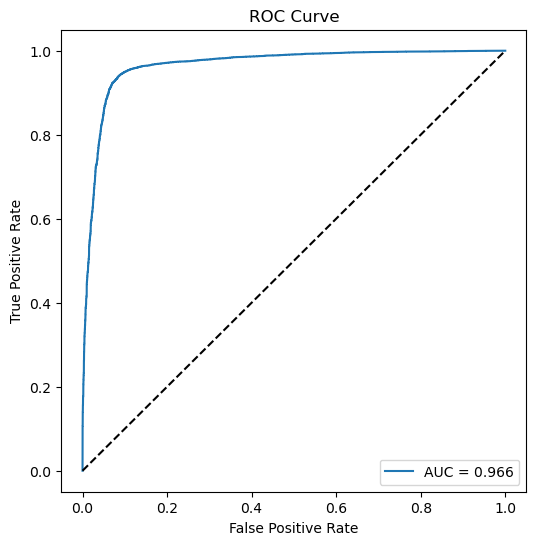

In [173]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)
auc_score = roc_auc_score(y_test, y_prob_test)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


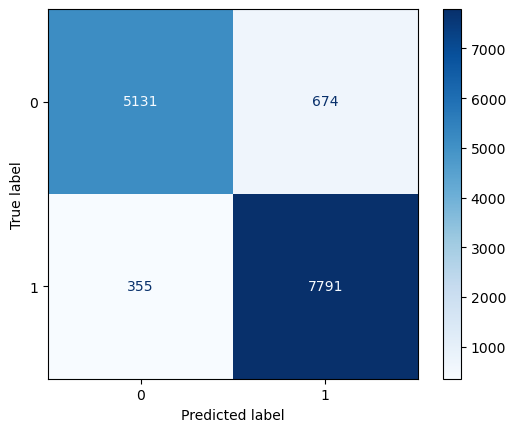

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = (y_prob_test >= best_t).astype(int)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.show()


5131 (TN) = correctly identified not depressed

674 (FP) = predicted depressed, but actually not

355 (FN) =  missed depressed individuals

7791 (TP) = correctly identified depressed individuals


The confusion matrix shows that the model correctly identifies the majority of depressed individuals, with relatively few false negatives, which is crucial for mental health screening tasks.